In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020-12-22T17:00:00,3,Lombardia,4290,540,4830,56314,61144,-170,2278,...,92.0,31939.0,11253.0,-207.0,11.18,7.90,7.13,20.24,-3.74,-0.28
302,2020-12-23T17:00:00,3,Lombardia,4243,536,4779,55460,60239,-905,2153,...,98.0,32926.0,10232.0,-854.0,11.22,7.93,6.54,21.04,-0.74,-1.48
303,2020-12-24T17:00:00,3,Lombardia,4178,521,4699,53209,57908,-2331,2656,...,67.0,32294.0,10934.0,-2251.0,11.09,8.11,8.22,24.29,-2.80,-3.87
304,2020-12-25T17:00:00,3,Lombardia,3976,522,4498,54212,58710,802,2628,...,105.0,27942.0,9754.0,1003.0,11.61,7.66,9.41,26.94,0.19,1.38


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1606
Nuovi tamponi: 15337.0
Percentuale nuovi positivi/nuovi tamponi: 10.5 %
Nuovi guariti: 658.0
Nuovi deceduti: 36.0
Variazione positivi ricoverati con sintomi: -137.0
Variazione positivi in terapia intensiva: -9.0
Variazione positivi in isolamento dimiciliare: 1058.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-27T17:00:00,3,Lombardia,2715,271,2986,51898,54884,4559,5035,...,58.0,29960.0,18328.0,4274.0,9.08,5.44,16.81,27.47,11.98,9.06
1,2020-10-28T17:00:00,3,Lombardia,3072,292,3364,58042,61406,6522,7558,...,47.0,41260.0,25359.0,6144.0,8.68,5.48,18.32,29.80,7.75,11.88
2,2020-10-29T17:00:00,3,Lombardia,3355,345,3700,64184,67884,6478,7339,...,57.0,42684.0,25221.0,6142.0,9.32,5.45,17.19,29.10,18.15,10.55
3,2020-10-30T17:00:00,3,Lombardia,3698,370,4068,71161,75229,7345,8960,...,48.0,46892.0,27579.0,6977.0,9.10,5.41,19.11,32.49,7.25,10.82
4,2020-10-31T17:00:00,3,Lombardia,4033,392,4425,77586,82011,6782,8919,...,73.0,46781.0,26476.0,6425.0,8.86,5.40,19.07,33.69,5.95,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-22T17:00:00,3,Lombardia,4290,540,4830,56314,61144,-170,2278,...,92.0,31939.0,11253.0,-207.0,11.18,7.90,7.13,20.24,-3.74,-0.28
57,2020-12-23T17:00:00,3,Lombardia,4243,536,4779,55460,60239,-905,2153,...,98.0,32926.0,10232.0,-854.0,11.22,7.93,6.54,21.04,-0.74,-1.48
58,2020-12-24T17:00:00,3,Lombardia,4178,521,4699,53209,57908,-2331,2656,...,67.0,32294.0,10934.0,-2251.0,11.09,8.11,8.22,24.29,-2.80,-3.87
59,2020-12-25T17:00:00,3,Lombardia,3976,522,4498,54212,58710,802,2628,...,105.0,27942.0,9754.0,1003.0,11.61,7.66,9.41,26.94,0.19,1.38


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

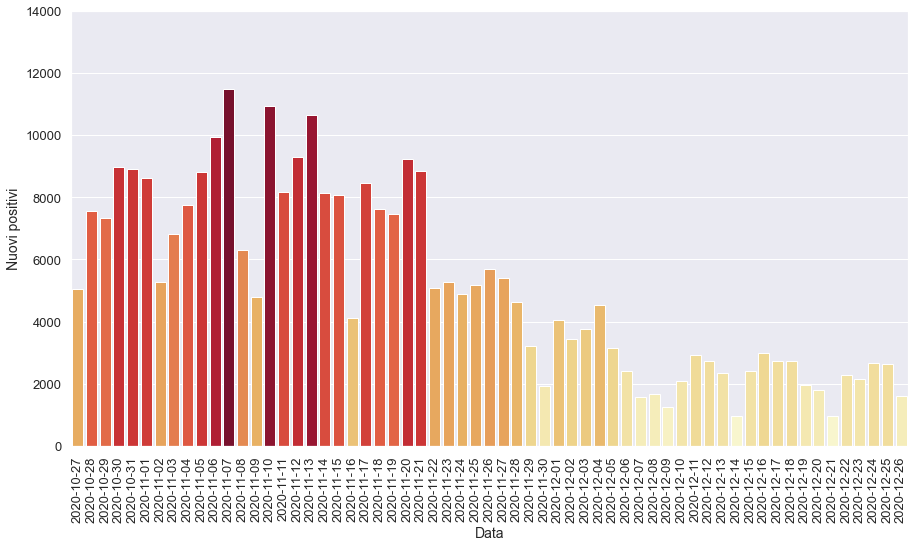

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

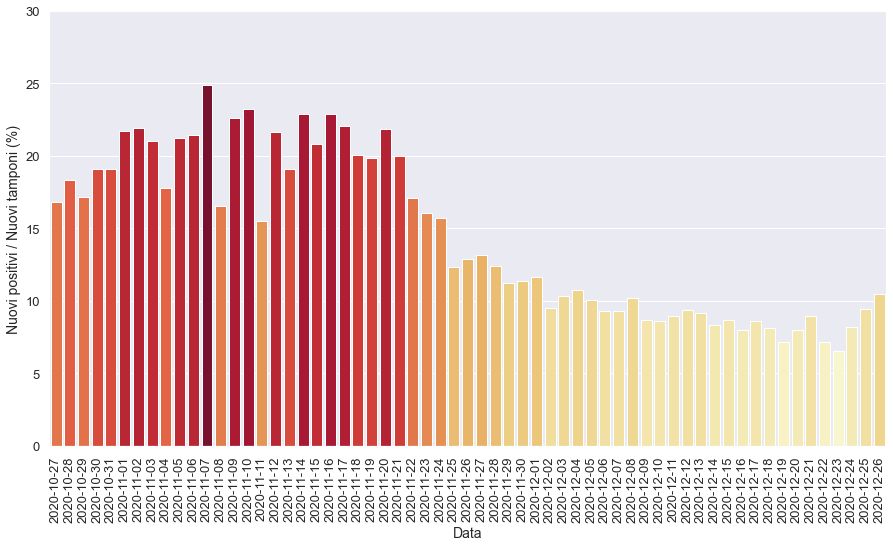

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

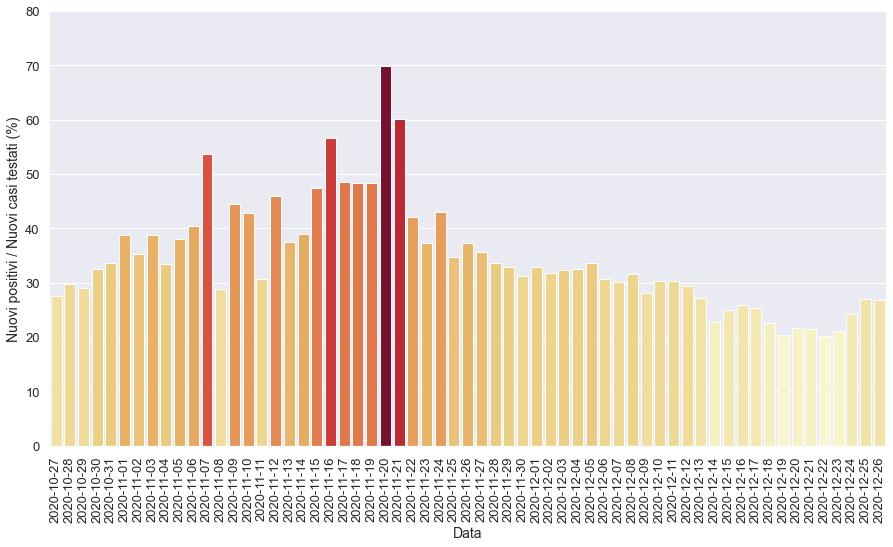

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

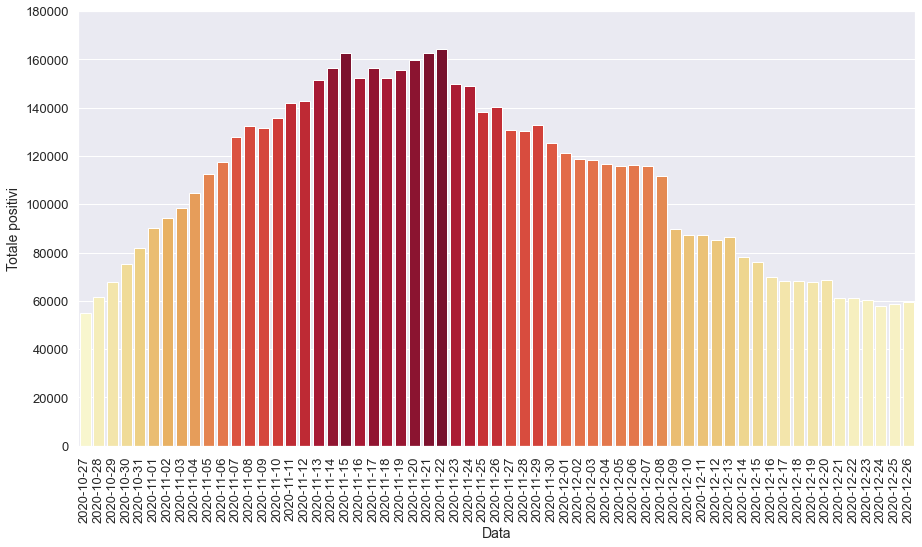

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

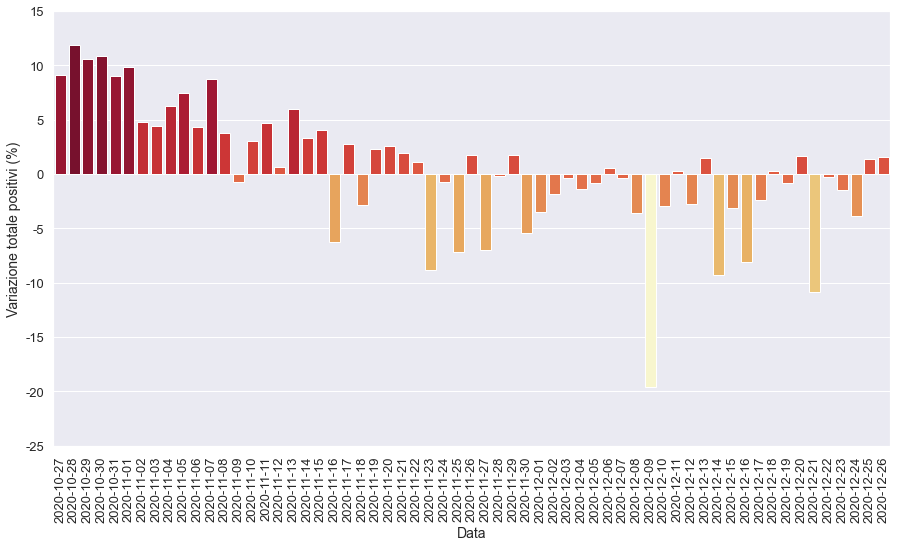

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

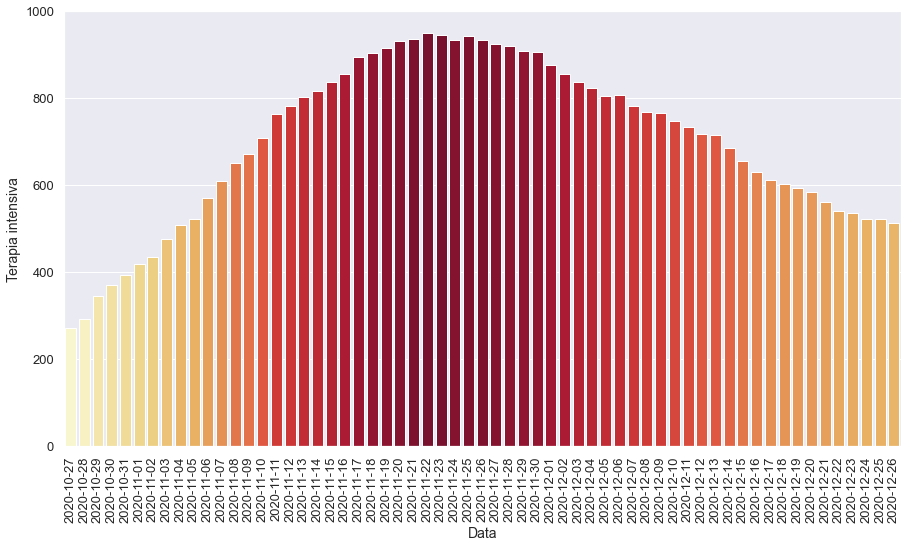

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

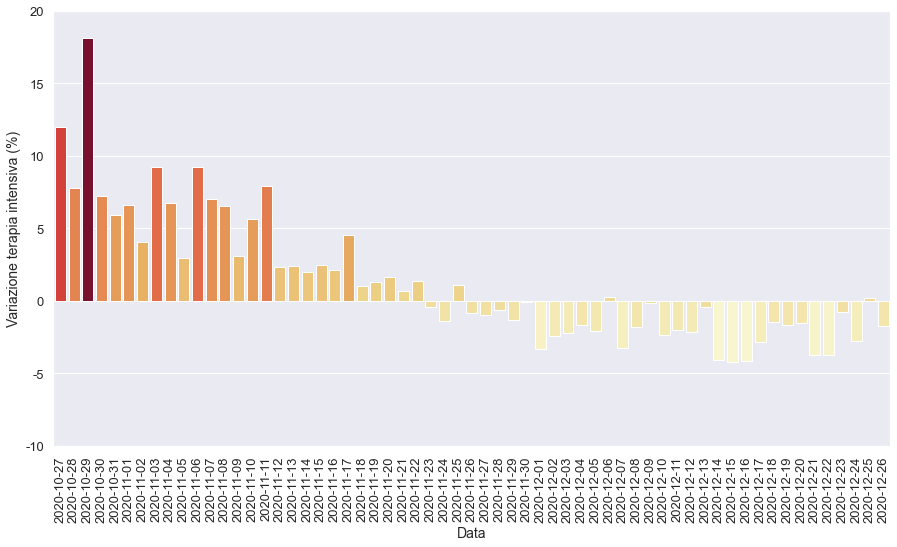

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

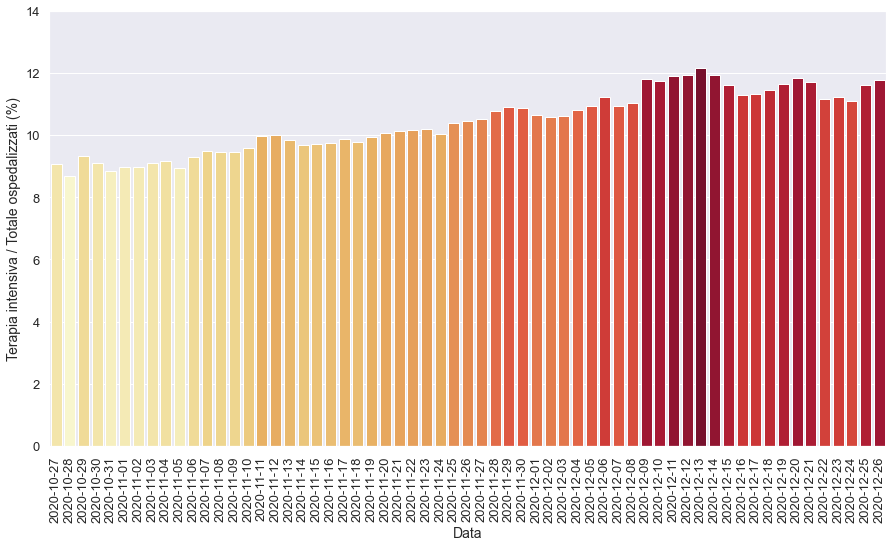

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

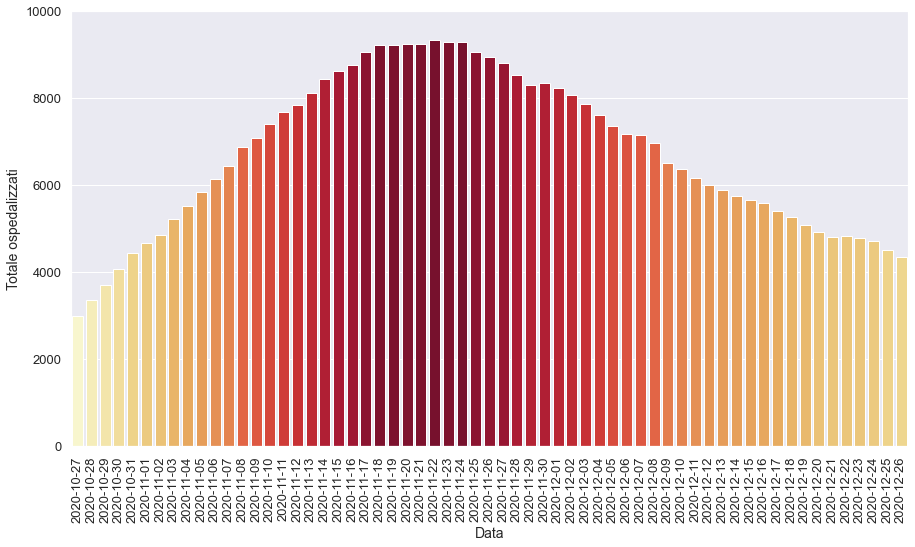

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

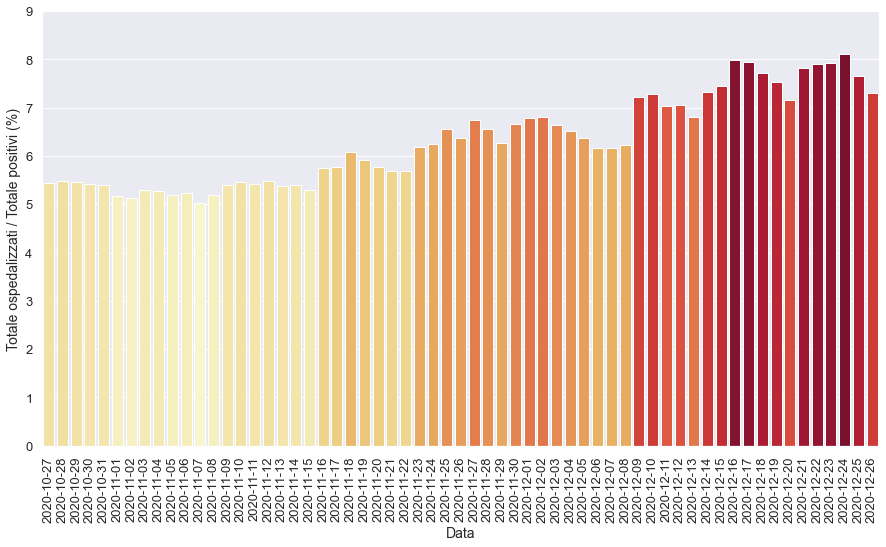

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

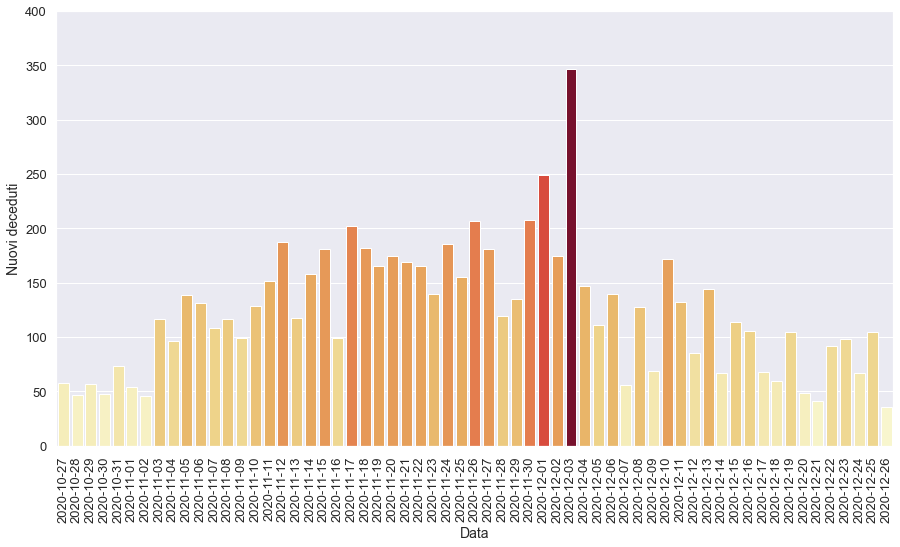

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

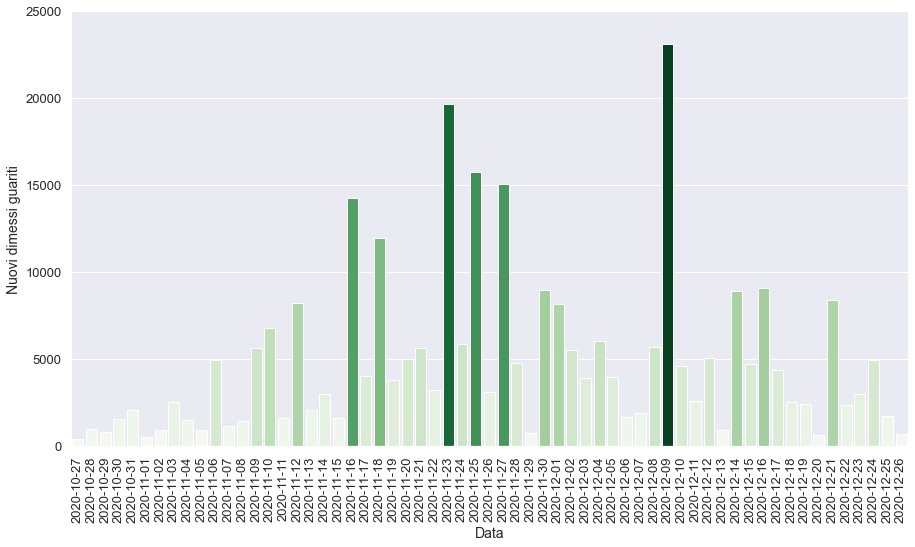

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-26T17:00:00,3,Lombardia,7996,934,8930,131471,140401,2372,5697,...,207.0,44231.0,15288.0,2498.0,10.46,6.36,12.88,37.26,-0.85,1.72
1,2020-11-27T17:00:00,3,Lombardia,7869,925,8794,121761,130555,-9846,5389,...,181.0,40931.0,15121.0,-9710.0,10.52,6.74,13.17,35.64,-0.96,-7.01
2,2020-11-28T17:00:00,3,Lombardia,7616,919,8535,121780,130315,-240,4615,...,119.0,37286.0,13715.0,19.0,10.77,6.55,12.38,33.65,-0.65,-0.18
3,2020-11-29T17:00:00,3,Lombardia,7400,907,8307,124320,132627,2312,3203,...,135.0,28434.0,9748.0,2540.0,10.92,6.26,11.26,32.86,-1.31,1.77
4,2020-11-30T17:00:00,3,Lombardia,7433,906,8339,117069,125408,-7219,1929,...,208.0,16987.0,6193.0,-7251.0,10.86,6.65,11.36,31.15,-0.11,-5.44
5,2020-12-01T17:00:00,3,Lombardia,7342,876,8218,112815,121033,-4375,4048,...,249.0,34811.0,12312.0,-4254.0,10.66,6.79,11.63,32.88,-3.31,-3.49
6,2020-12-02T17:00:00,3,Lombardia,7222,855,8077,110719,118796,-2237,3425,...,175.0,36077.0,10769.0,-2096.0,10.59,6.80,9.49,31.80,-2.40,-1.85
7,2020-12-03T17:00:00,3,Lombardia,7025,836,7861,110470,118331,-465,3751,...,347.0,36271.0,11569.0,-249.0,10.63,6.64,10.34,32.42,-2.22,-0.39
8,2020-12-04T17:00:00,3,Lombardia,6792,822,7614,109088,116702,-1629,4533,...,147.0,42276.0,13949.0,-1382.0,10.80,6.52,10.72,32.50,-1.67,-1.38
9,2020-12-05T17:00:00,3,Lombardia,6554,805,7359,108397,115756,-946,3148,...,111.0,31193.0,9364.0,-691.0,10.94,6.36,10.09,33.62,-2.07,-0.81


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

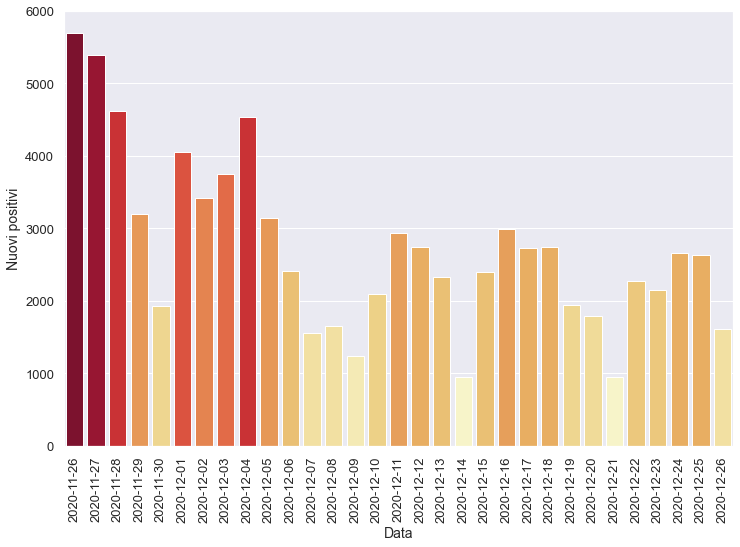

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

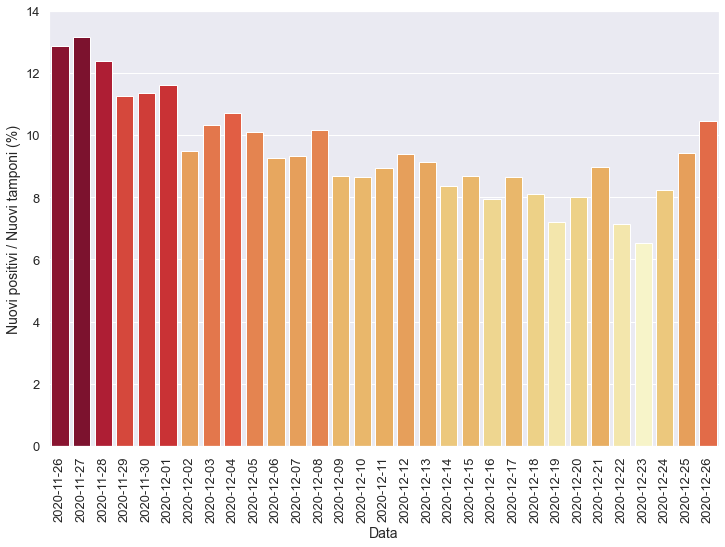

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

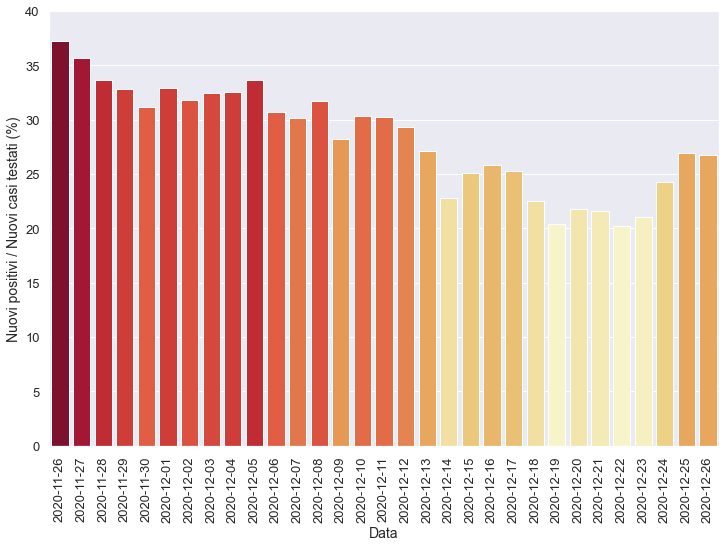

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

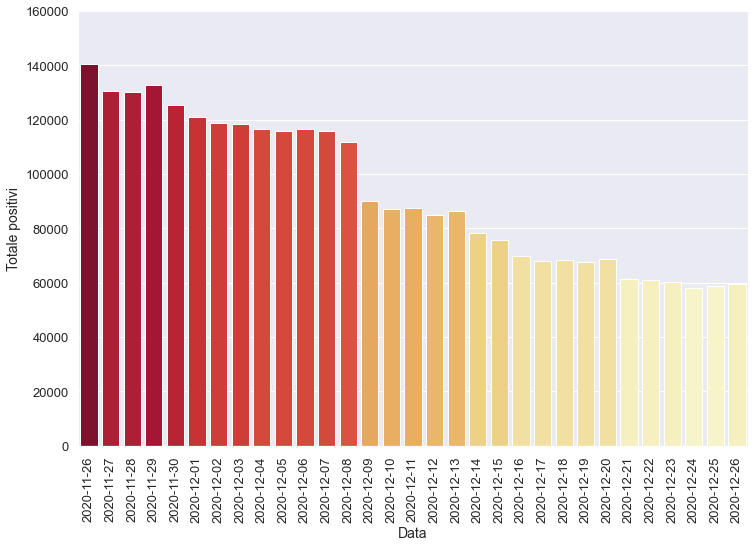

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

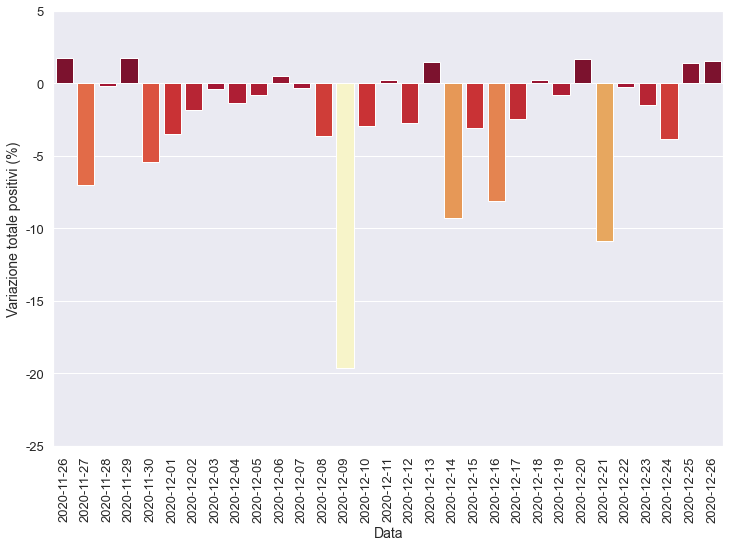

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

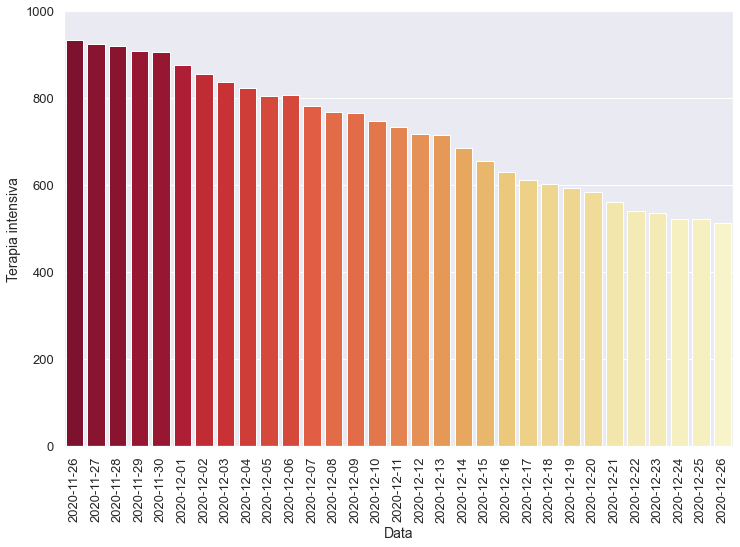

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

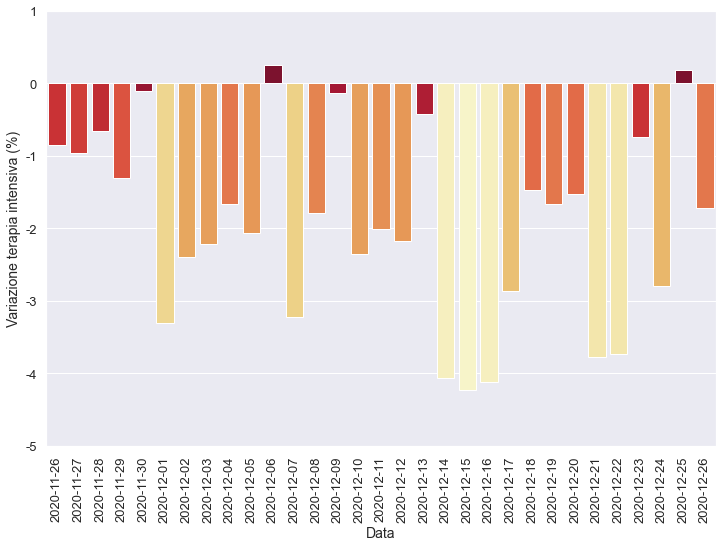

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

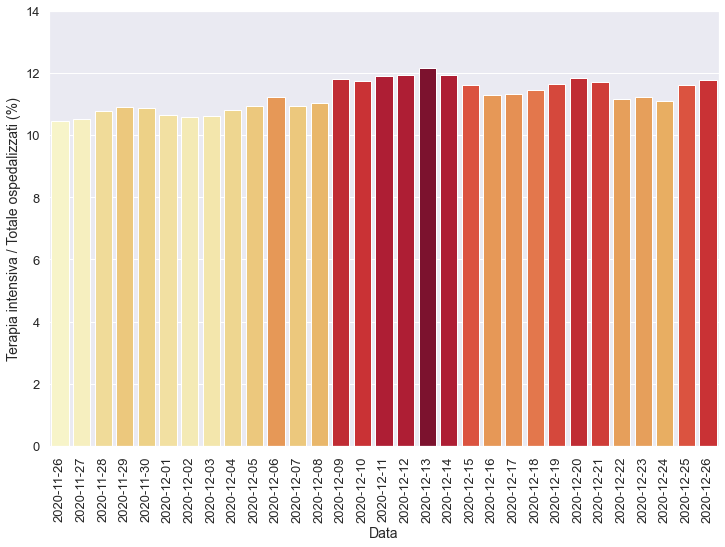

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

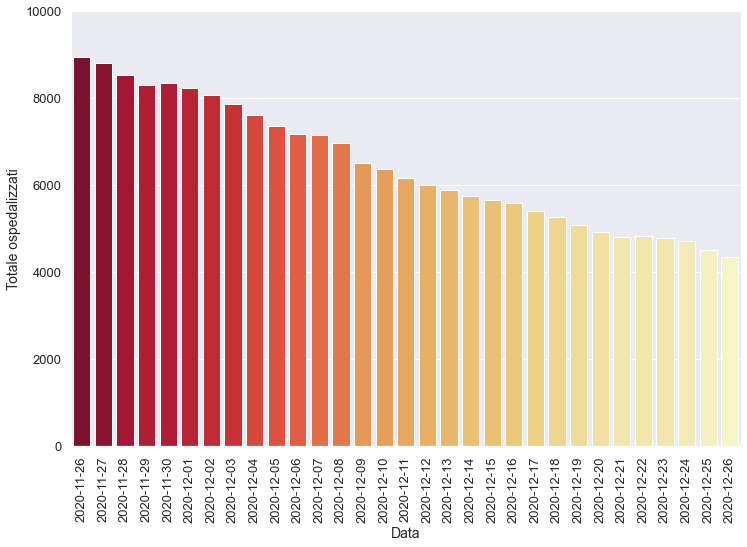

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

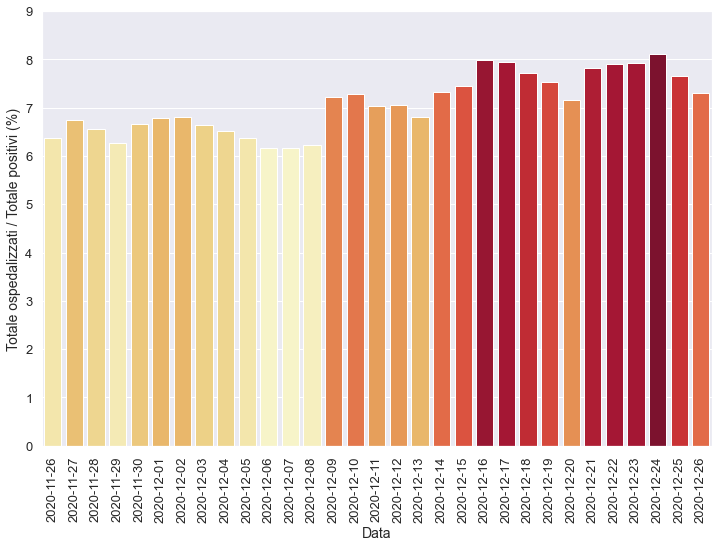

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

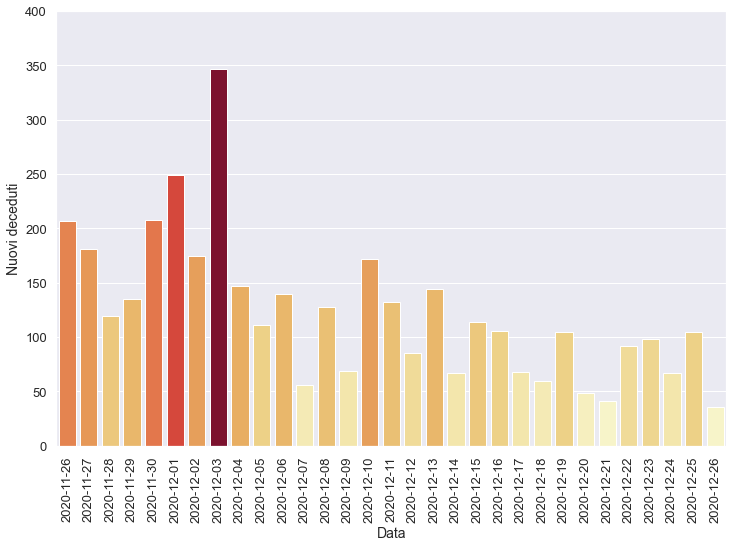

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

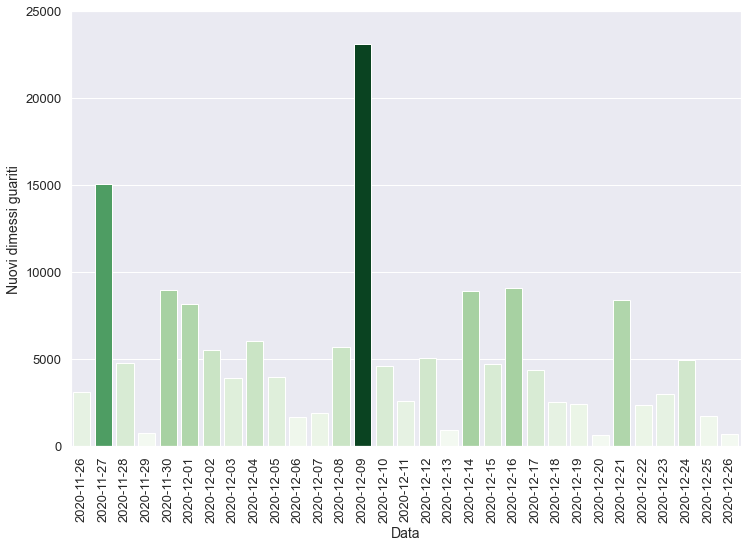

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-19T17:00:00,3,Lombardia,4495,592,5087,62566,67653,-557,1944,...,105.0,27044.0,9517.0,-386.0,11.64,7.52,7.19,20.43,-1.66,-0.82
1,2020-12-20T17:00:00,3,Lombardia,4341,583,4924,63857,68781,1128,1795,...,49.0,22421.0,8253.0,1291.0,11.84,7.16,8.01,21.75,-1.52,1.67
2,2020-12-21T17:00:00,3,Lombardia,4232,561,4793,56521,61314,-7467,950,...,41.0,10587.0,4405.0,-7336.0,11.70,7.82,8.97,21.57,-3.77,-10.86
3,2020-12-22T17:00:00,3,Lombardia,4290,540,4830,56314,61144,-170,2278,...,92.0,31939.0,11253.0,-207.0,11.18,7.90,7.13,20.24,-3.74,-0.28
4,2020-12-23T17:00:00,3,Lombardia,4243,536,4779,55460,60239,-905,2153,...,98.0,32926.0,10232.0,-854.0,11.22,7.93,6.54,21.04,-0.74,-1.48
5,2020-12-24T17:00:00,3,Lombardia,4178,521,4699,53209,57908,-2331,2656,...,67.0,32294.0,10934.0,-2251.0,11.09,8.11,8.22,24.29,-2.80,-3.87
6,2020-12-25T17:00:00,3,Lombardia,3976,522,4498,54212,58710,802,2628,...,105.0,27942.0,9754.0,1003.0,11.61,7.66,9.41,26.94,0.19,1.38
7,2020-12-26T17:00:00,3,Lombardia,3839,513,4352,55270,59622,912,1606,...,36.0,15337.0,5996.0,1058.0,11.79,7.30,10.47,26.78,-1.72,1.55


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

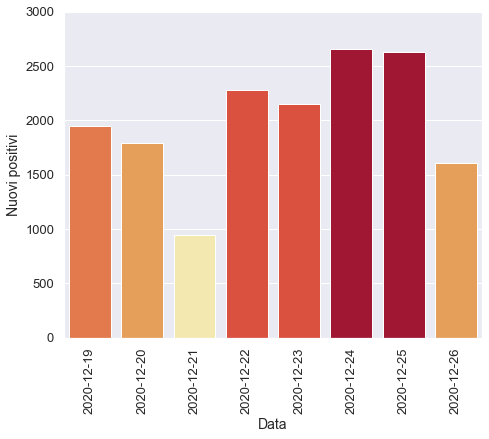

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

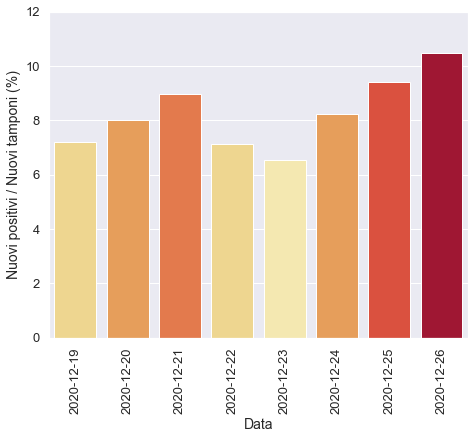

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

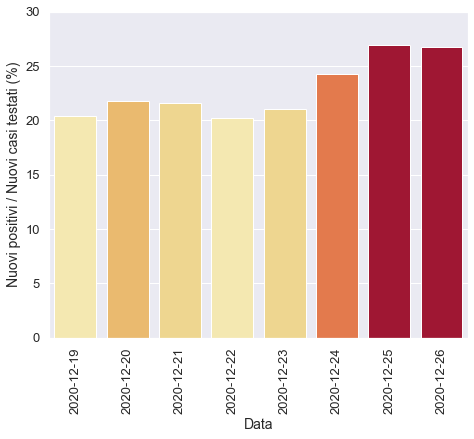

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

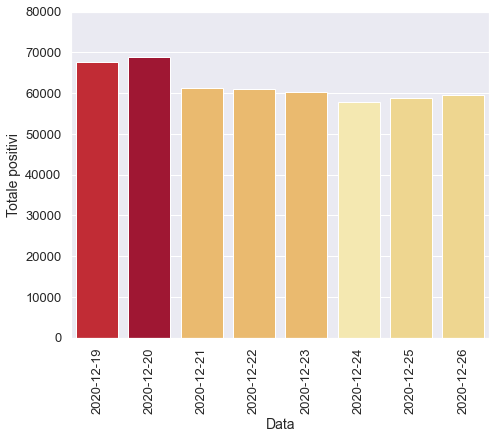

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

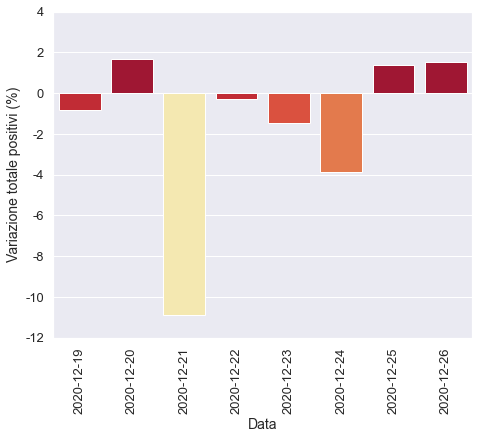

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

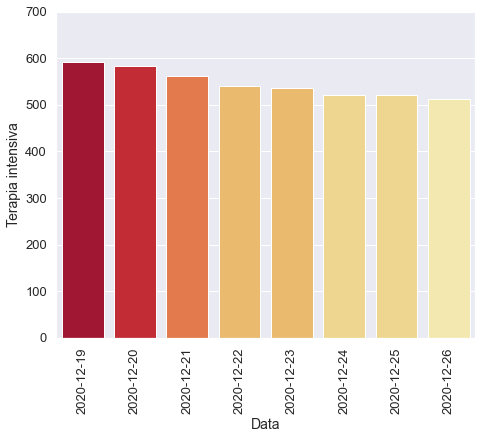

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

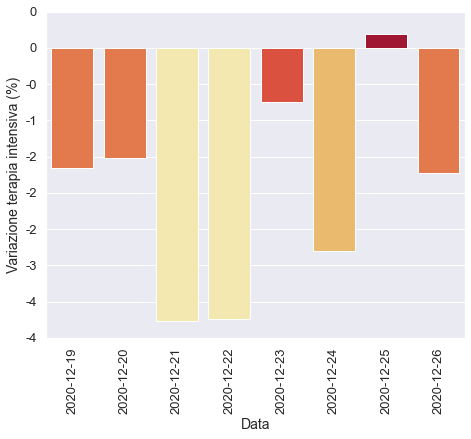

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

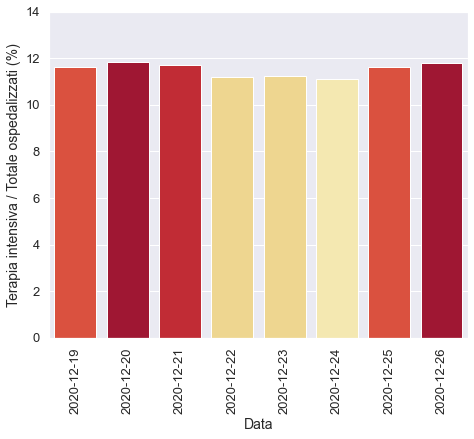

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

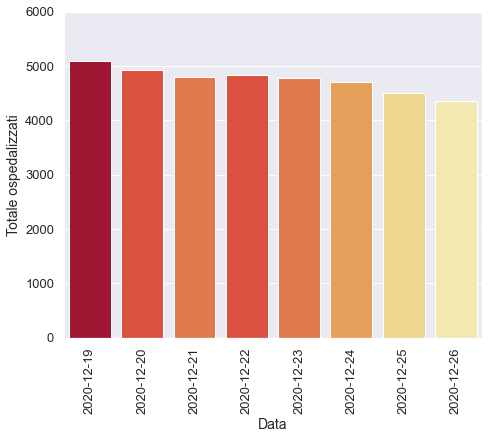

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

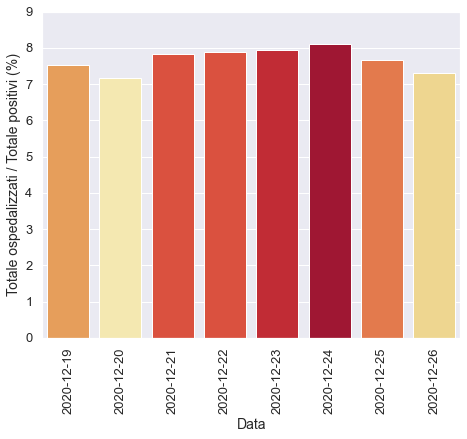

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

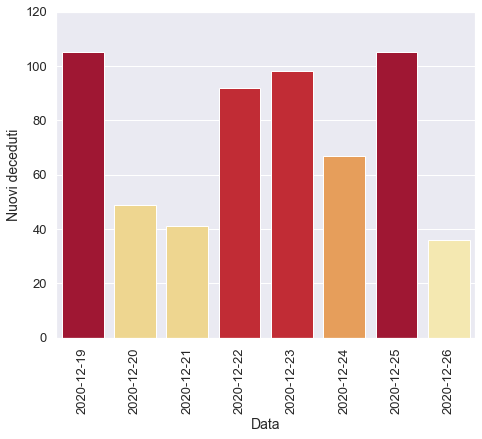

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

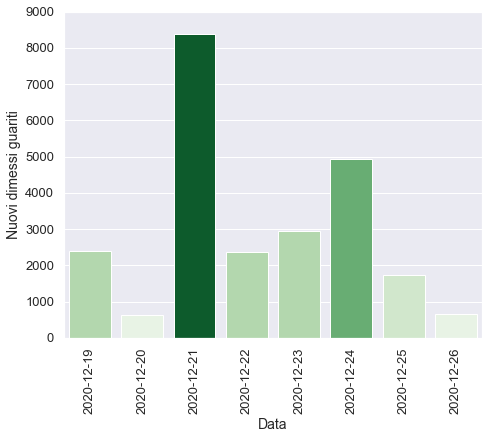

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)